# **Handling Outliers**

## **Percentile method**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


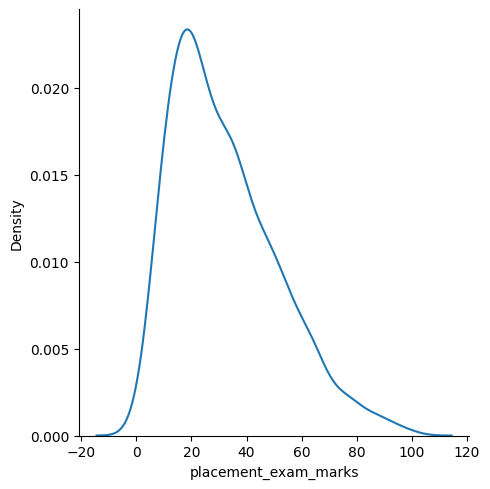

In [103]:
sns.displot(df['placement_exam_marks'],kind='kde')
plt.show()

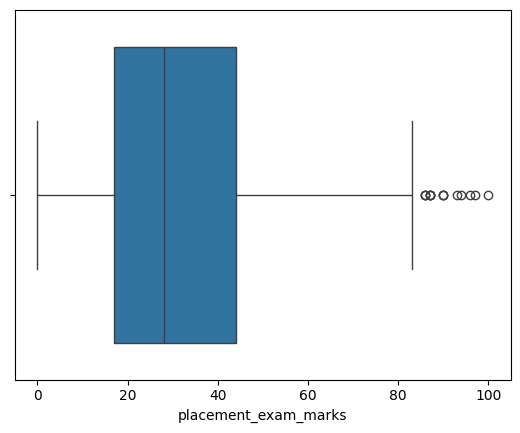

In [104]:
sns.boxplot(df['placement_exam_marks'],orient='y')
plt.show()

### Upper limit

In [105]:
upper_limit = df['placement_exam_marks'].quantile(0.985)

### Lower limit

In [106]:
lower_limit = df['placement_exam_marks'].quantile(0.015)

## **Trimming**

In [107]:
df[(df['placement_exam_marks'] >= lower_limit) & (df['placement_exam_marks'] <= upper_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


## **Capping/ Winsorization**

In [108]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks'] < lower_limit,
    lower_limit,
    np.where(
        df['placement_exam_marks'] > upper_limit,
        upper_limit,
        df['placement_exam_marks']
    )
)

In [109]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


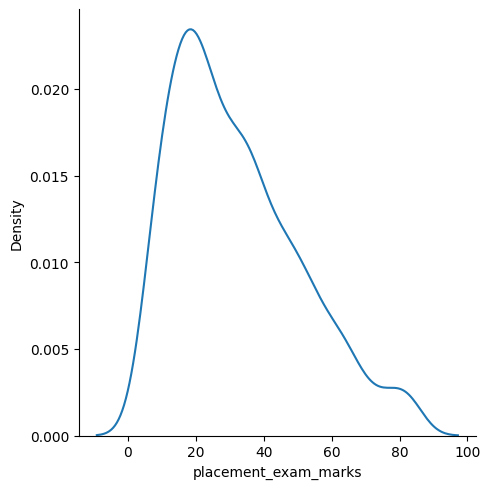

In [110]:
sns.displot(df['placement_exam_marks'],kind='kde')
plt.show()

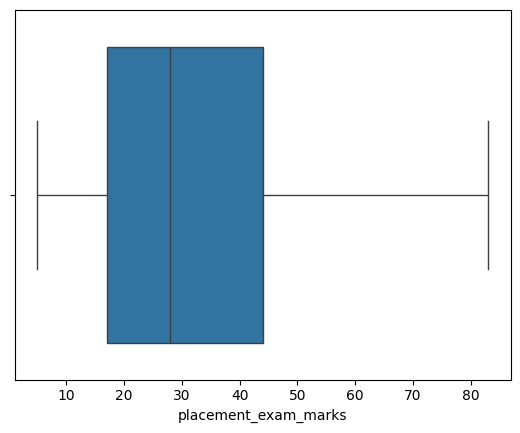

In [111]:
sns.boxplot(df['placement_exam_marks'],orient='y')
plt.show()